In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv(r"D:\archive.zip") 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


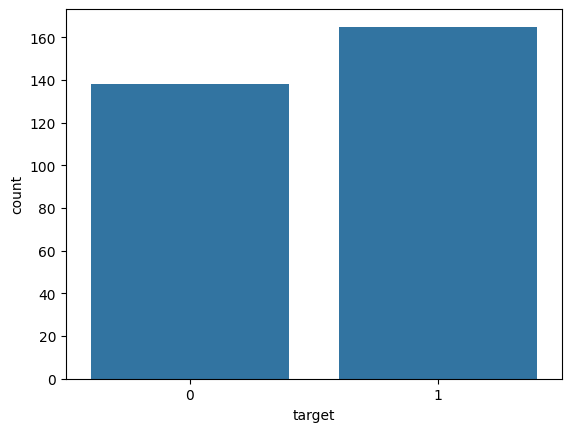

In [6]:
sns.countplot(x="target",data=df)
plt.show()

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


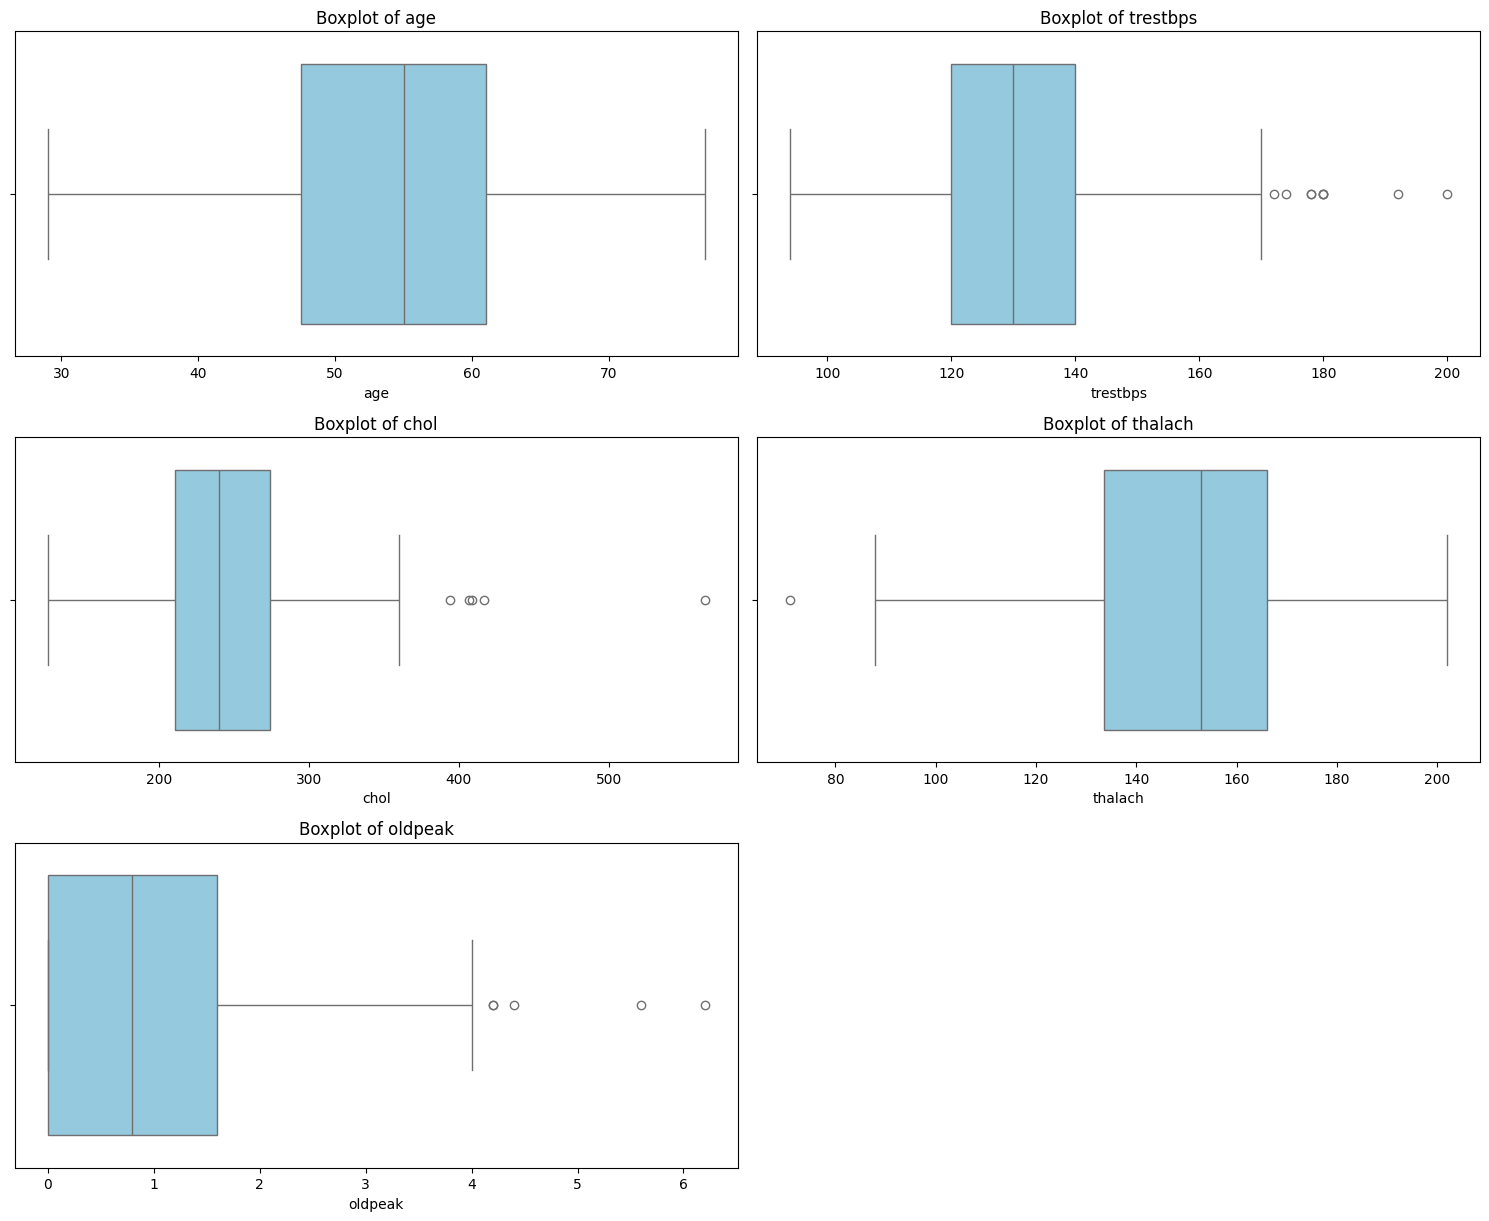

In [8]:
cols=["age","trestbps","chol","thalach","oldpeak"]
plt.figure(figsize=(15,20))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [9]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df

In [10]:
df = remove_outliers_iqr(df, ['chol', 'oldpeak'])

In [11]:
df=df.drop_duplicates()

In [12]:
X = df.drop("target", axis=1)
y = df["target"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)        

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

In [16]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((name, acc, prec, rec, f1))

[LightGBM] [Info] Number of positive: 128, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540084 -> initscore=0.160682
[LightGBM] [Info] Start training from score 0.160682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [17]:
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print(df_results.sort_values(by="Accuracy", ascending=False))

                  Model  Accuracy  Precision    Recall        F1
10             CatBoost  0.833333   0.833714  0.833333  0.832579
7     Gradient Boosting  0.833333   0.833333  0.833333  0.833333
0   Logistic Regression  0.816667   0.818056  0.816667  0.815260
9              LightGBM  0.800000   0.800000  0.800000  0.799095
2         Random Forest  0.800000   0.800000  0.800000  0.800000
6              AdaBoost  0.800000   0.802670  0.800000  0.800446
8               XGBoost  0.800000   0.800000  0.800000  0.799095
1         Decision Tree  0.750000   0.751116  0.750000  0.750350
5           Naive Bayes  0.733333   0.733333  0.733333  0.733333
4                   KNN  0.683333   0.684598  0.683333  0.683776
3                   SVM  0.633333   0.630670  0.633333  0.629143


In [18]:
param_grid = {'iterations': [100, 200, 300],'depth': [5, 7, 10],'learning_rate': [0.01, 0.05, 0.1]}
grid = GridSearchCV(CatBoostClassifier(verbose=0, random_state=42), param_grid, cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'depth': 10, 'iterations': 100, 'learning_rate': 0.01}


In [19]:
best_model = CatBoostClassifier(depth=10,iterations= 100, learning_rate= 0.01)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

0:	learn: 0.6913584	total: 10.6ms	remaining: 1.05s
1:	learn: 0.6887215	total: 13.6ms	remaining: 668ms
2:	learn: 0.6875145	total: 24.5ms	remaining: 794ms
3:	learn: 0.6849427	total: 26.5ms	remaining: 636ms
4:	learn: 0.6814387	total: 27.1ms	remaining: 516ms
5:	learn: 0.6799806	total: 36.9ms	remaining: 578ms
6:	learn: 0.6776368	total: 47.1ms	remaining: 626ms
7:	learn: 0.6761726	total: 57.6ms	remaining: 662ms
8:	learn: 0.6745542	total: 68.9ms	remaining: 697ms
9:	learn: 0.6730099	total: 80.1ms	remaining: 721ms
10:	learn: 0.6714752	total: 91.3ms	remaining: 739ms
11:	learn: 0.6688197	total: 94.3ms	remaining: 692ms
12:	learn: 0.6673394	total: 105ms	remaining: 700ms
13:	learn: 0.6656428	total: 115ms	remaining: 709ms
14:	learn: 0.6635392	total: 126ms	remaining: 713ms
15:	learn: 0.6620804	total: 136ms	remaining: 713ms
16:	learn: 0.6604964	total: 147ms	remaining: 720ms
17:	learn: 0.6576047	total: 148ms	remaining: 674ms
18:	learn: 0.6557054	total: 150ms	remaining: 639ms
19:	learn: 0.6523406	total: 1

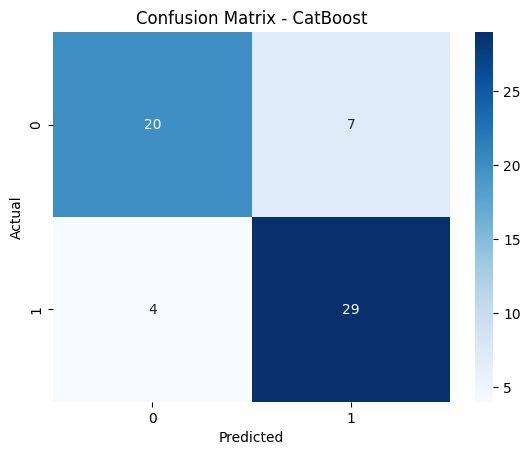

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.84        33

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



In [22]:
import joblib
joblib.dump(best_model, r"D:\classification_proj\model_catboost_heart_disease.joblib")

['D:\\classification_proj\\model_catboost_heart_disease.joblib']